In [1]:
cd /content/drive/MyDrive/corizo_project

/content/drive/MyDrive/corizo_project


**Domain:
Semiconductor Manufacturing Process**

Context :

A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signal variables collected from sensors and/or process measurement points. However, not all these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information, and noise. Engineers typically have a much larger number of signals than required. Feature selection may be applied to identify the most relevant signals. Process Engineers can then use these signals to determine key factors contributing to yield excursions downstream in the process, enabling an increase in process throughput, decreased time to learning, and reduced per-unit production costs. These signals can be used as features to predict the yield type, and by analyzing different combinations of features, essential signals impacting the yield type can be identified.

Data Description :-

Dataset:
sensor-data.csv

Dimensions:
1567 rows, 591 features

The dataset consists of 1567 examples, each with 591 features. Each example represents a single production entity with associated measured features, and the labels represent a simple pass/fail yield for in-house line testing. The target column "-1" corresponds to a pass, and "1" corresponds to a fail. The data timestamp is for that specific test point.

Project Objective :

The objective is to build a classifier to predict the Pass/Fail yield of a particular process entity and analyze whether all the features are required to build the model.

 **1.** **Importing and Exploring the Data :**

We start by importing the data from the CSV file and exploring its structure, summary statistics, and initial observations.

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('sensor-data.csv')

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None
                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
me

**2.** **Data Cleansing**

Missing Value Treatment :

Identify and handle missing values.

In [7]:
data = df.replace(np.NaN, 0)

data.isnull().any().any()

False

**3.** **Data Analysis & Visualization**

Perform detailed relevant statistical analysis on the data, including univariate, bivariate, and multivariate analysis.

In [8]:
unique_vals = data['Pass/Fail'].unique()  # [0, 1, 2]
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]

<ipython-input-10-9b3fd45ee51f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target['1'], hist=True, rug=True)
<ipython-input-10-9b3fd45ee51f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target['1'], hist=True, rug=True)
<ipython-input-10-9b3fd45ee51f>:13: UserWarning: 

`distplot` is a

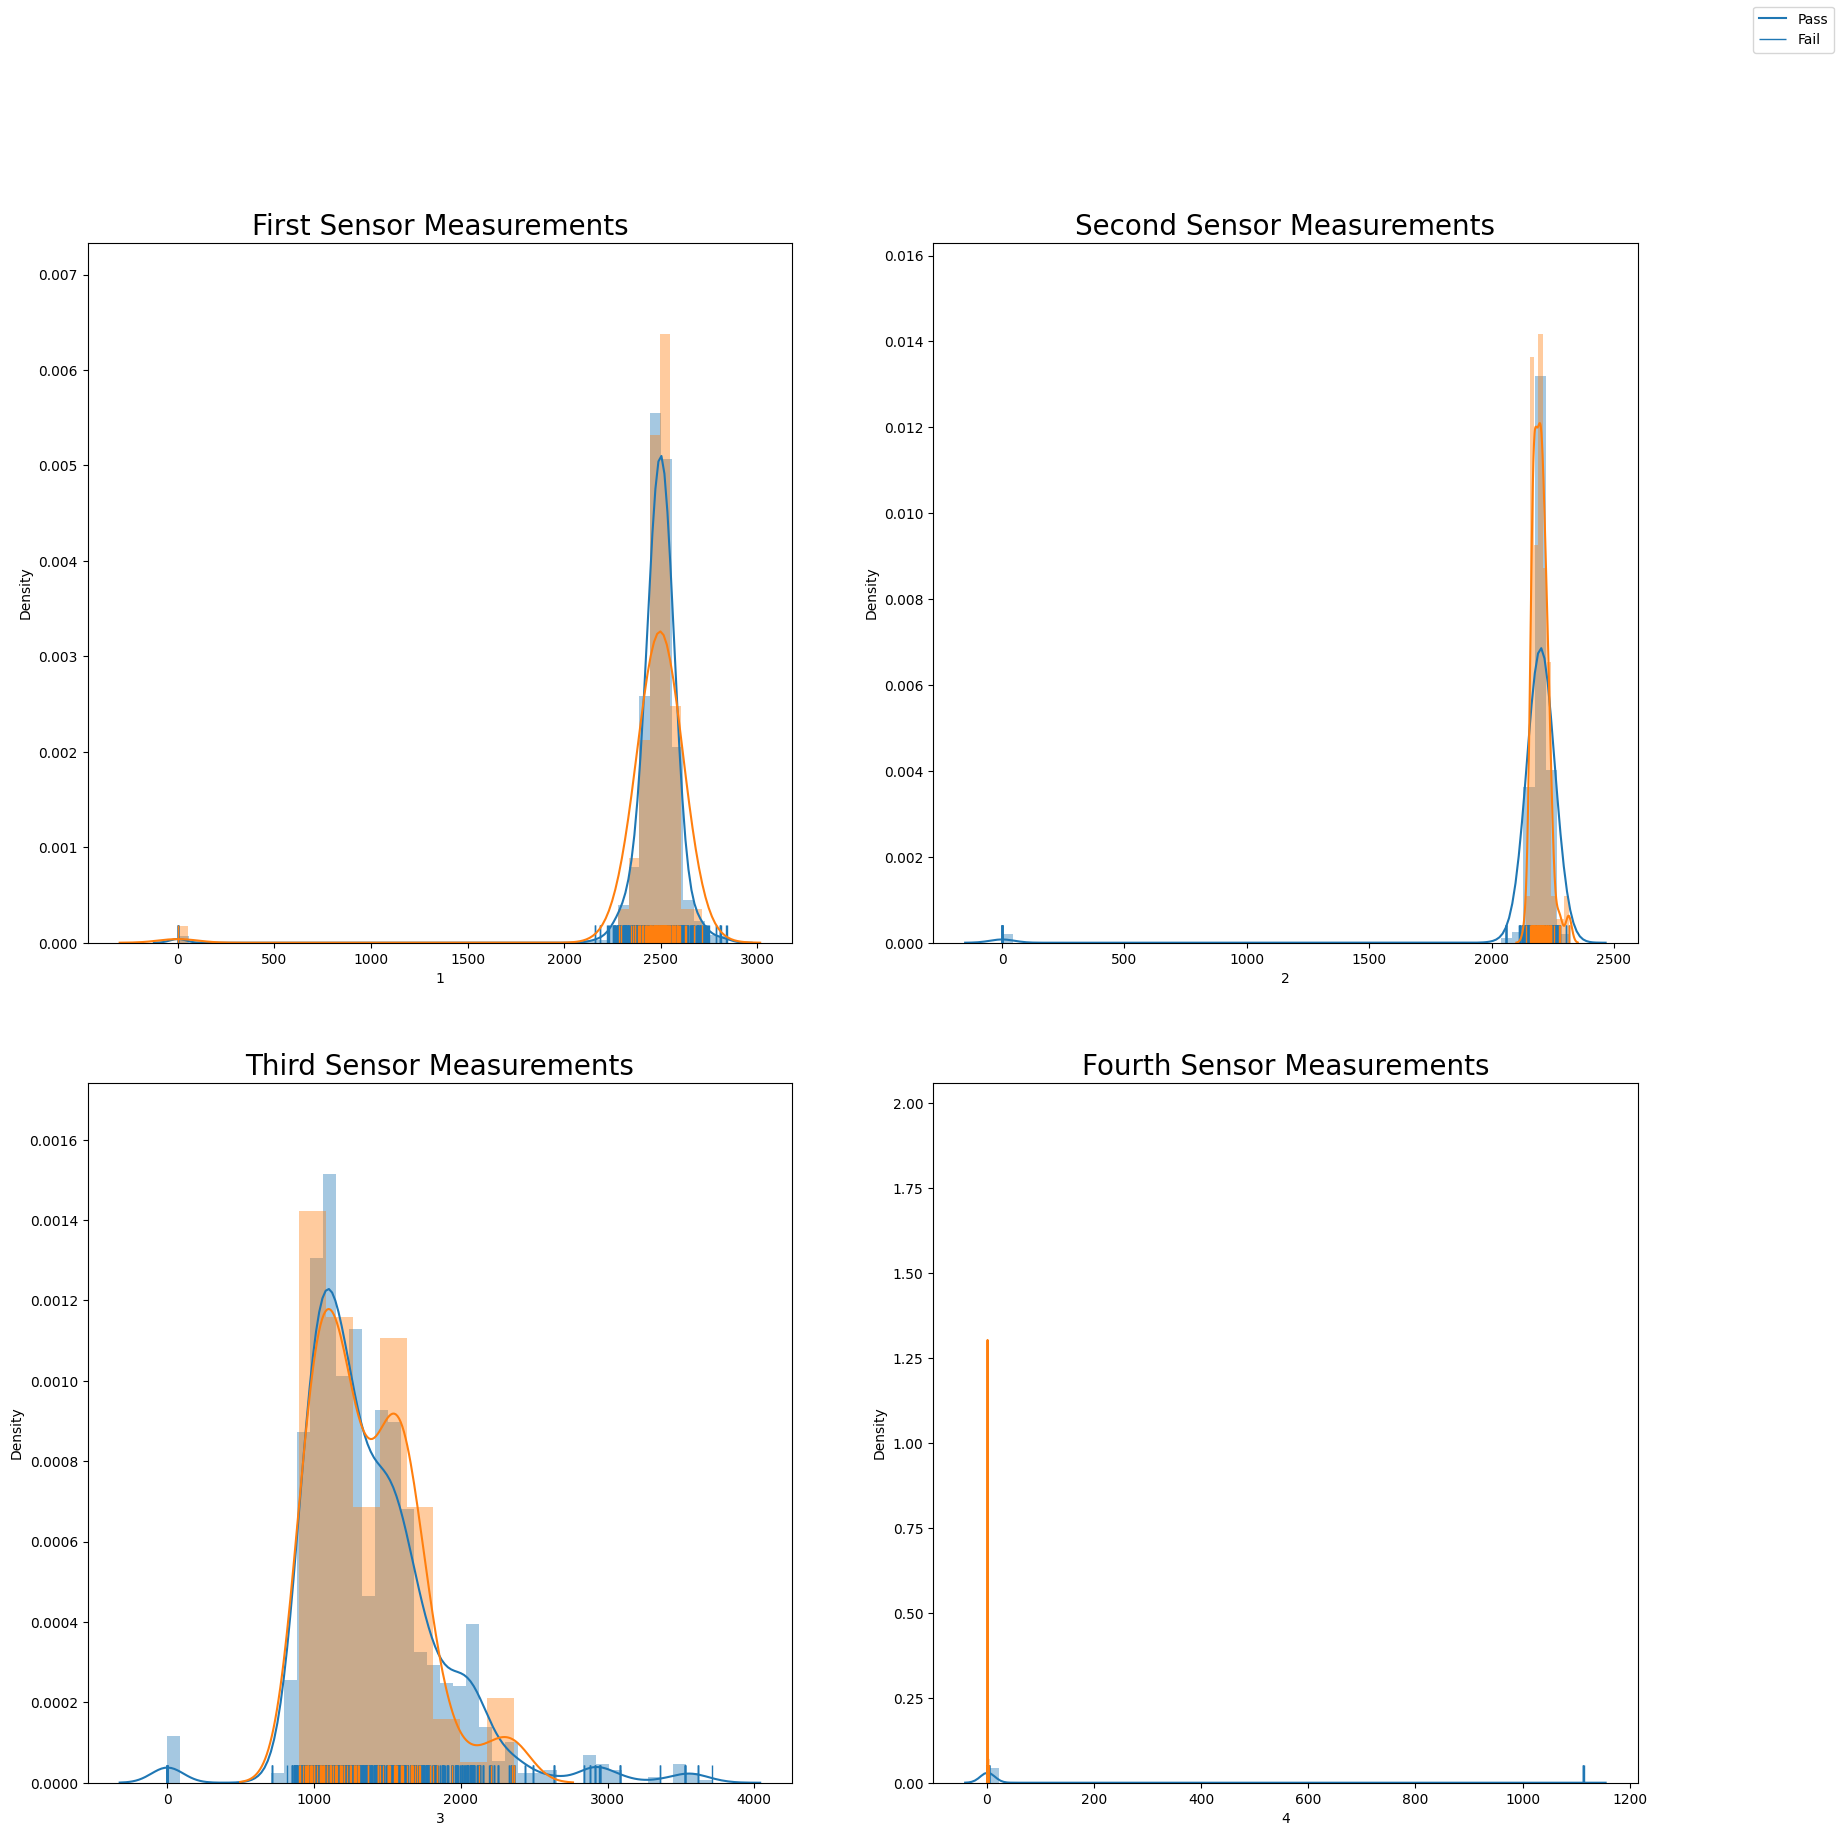

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

fig.legend(labels=['Pass','Fail'])
plt.show()

The plots indicate the distributions of sensor measurements, showing how frequently certain values occur.

The presence of distinct peaks, particularly in the first plot, might indicate normal operating conditions for most instances. The smaller peaks could represent outliers or unusual conditions.

The different colors suggest an attempt to differentiate between classes, possibly the Pass/Fail classification.

**4. Data Pre-processing**

  Objective:
        
  Remove collinear features in a dataframe with a correlation coefficient
  greater than the threshold. Removing collinear features can help a model
  to generalize and improves the interpretability of the model.

  Inputs:
        
  x: features dataframe
 threshold: features with correlations greater than this value are removed

   Output:
        
  dataframe that contains only the non-highly-collinear features


In [11]:
x = data.iloc[:,:306]
y = data["Pass/Fail"]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 306)
shape of y: (1567,)


Check for Target Balancing :

Check if the target is balanced and fix it if found imbalanced

Train-Test Split and Standardization :

Split the data into training and testing sets and standardize if required.

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 306)
shape of x_test:  (471, 306)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_numeric = x_train.iloc[:, 1:]
x_test_numeric = x_test.iloc[:, 1:]

x_train_scaled = sc.fit_transform(x_train_numeric)
x_test_scaled = sc.transform(x_test_numeric)

**5. Model Training, Testing, and Tuning**

Model Training :

Train the model using supervised learning techniques.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

x_train_numeric = x_train.iloc[:, 1:]
x_test_numeric = x_test.iloc[:, 1:]

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_numeric)
x_test_scaled = sc.transform(x_test_numeric)

model = RandomForestClassifier()

model.fit(x_train_scaled, y_train)

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

best_model = grid_search.best_estimator_

Model Evaluation :

Evaluate the model using appropriate metrics and cross-validation.

In [20]:
from sklearn.metrics import classification_report

x_test_numeric = x_test.iloc[:, 1:]

y_pred = best_model.predict(x_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       439
           1       0.00      0.00      0.00        32

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

x_train_numeric = x_train.iloc[:, 1:]
x_test_numeric = x_test.iloc[:, 1:]

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_numeric)
x_test_scaled = sc.transform(x_test_numeric)

models = {'RandomForest': RandomForestClassifier(),
          'SVM': SVC(),
          'NaiveBayes': GaussianNB()}

for name, model in models.items():
    if name in ['RandomForest', 'SVM', 'NaiveBayes']:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    print(f'{name} Model Report:')
    print(classification_report(y_test, y_pred))

RandomForest Model Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       439
           1       0.00      0.00      0.00        32

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

SVM Model Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       439
           1       0.00      0.00      0.00        32

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471

NaiveBayes Model Report:
              precision    recall  f1-score   support

          -1       0.94      0.11      0.20       439
           1       0.07      0.91      0.13        32

    accuracy                           0.16       471
   macro avg       0.51      0.51      0.16       471
weig

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**6. Conclusion :**

By the above comparison between 3 diffrent trainning algorithms (Random Forest , SVM , and Naive Bayes) :


.    The Random Forest and SVM models have similar performance, with high accuracy and excellent performance for class -1, but they fail to predict class 1. This indicates that these models are biased towards the majority class (-1) and are not effectively handling the class imbalance.

.  The Naive Bayes model, on the other hand, has very low overall accuracy and performs poorly across both classes, although it has a high recall for class 1.